**1.**

a) Classification decision trees predicts a categorical variable with a set of predictor variables. It uses a series of sequençial decision rules to classify data into different categories, similar to a flowchart. Regression Decision Trees, on the other hand, are designed to predict continuous numeric outcomes. Although less commonly used than their classification counterparts, they offer a non-parametric approach to regression problems.
Decision Trees can be used for both classification and regression. 
Some real world applications would be,
• Predicting if a person has a disease according to the symptoms they exhibit.
• Classifying customers based on demographics, purchasing behavior and engagement patterns for marketing strategies.
• Filtering spam emails based on content, sender information and other frquencies.

b) Classification Decision Trees use a tree-like structure to make predictions. Data is traveresed through a tree based on sequential decision rules, arriving at a leaf node representing the predicted category. They are able to handle complex interactions and non-linear relationships through the branching structure of the tree. Inaddition, techniques like tree depth limitations and pruning can be used to prevent overfitting and manage model complexity.

In contrast, Multiple Linear Regression makes predictions using a linear equation. This equation combines the predictor variables with coefficients, each representing the average change in the outcome variable for a one-unit increase in the corresponding predictor variable, holding all other predictors constant.

NotebookLM Summary:
This chat explored the differences between **classification** and **regression** decision trees, as well as how **Classification Decision Trees** make predictions compared to **Multiple Linear Regression**.

*   Decision trees can be used for both **classification** and **regression** tasks.
*   **Classification Decision Trees** predict **categorical outcomes**, while **Regression Decision Trees** predict **continuous numeric outcomes**.
*   **Classification** tasks involve predicting categories or classes, whereas **regression** tasks focus on predicting numeric values.

### How Classification Decision Trees and Multiple Linear Regression Make Predictions

*   **Classification Decision Trees make predictions by navigating a decision path:** Starting at the root node, the tree branches out based on decision rules applied to predictor variables. The process continues until a leaf node is reached, which provides the final predicted category.
*   **Multiple Linear Regression makes predictions using a linear equation:** This equation combines predictor variables and coefficients. Each coefficient represents the average change in the outcome variable associated with a one-unit increase in the corresponding predictor variable.&#x20;

The sources discuss **Simple Linear Regression** and **Multiple Linear Regression** extensively, but they do not explicitly contrast the prediction methods of **Classification Decision Trees** and **Multiple Linear Regression**. The response above draws on information from the sources and the conversation history, and also relies on general knowledge of machine learning concepts that is not included in the sources.


**2.**

1.	Accuracy
• Accuracy is the proportion of correctly classified cases (both positives and negatives) out of the total cases.
Best sitaution would be where both false positives (FP) and false negatives (FN) have similar costs or risks.
Example: Predicting whether an email is spam or not spam. Both errors (marking legitimate email as spam or failing to catch spam) are equally undesirable.

2.	Sensitivity (Recall)
Sensitivity measures the proportion of true positives that are correctly identified.
Best applications would be where identifying all actual positives is critical, even at the risk of false positives.
Example: Screening for diseases (e.g., cancer detection). Missing a positive case (FN) is worse than flagging a negative case (FP) for further testing.

3.	Specificity
Specificity measures the proportion of true negatives that are correctly identified.
Best situations would be where minimizing false positives is crucial.
Example: Fraud detection in credit card transactions. Incorrectly flagging legitimate transactions as fraud can inconvenience users.

4.	Precision
Precision measures the proportion of predicted positives that are actual positives.
Most applicable where the cost of false positives is high, and we care about the reliability of positive predictions.
Example: Hiring algorithms that predict if a candidate is suitable for a job. Incorrectly predicting suitability (FP) wastes time and resources.

ChatGPT Summary:
	1.	Accuracy: Correct predictions overall (e.g., spam filters).
	2.	Sensitivity: Catch all positives (e.g., disease tests).
	3.	Specificity: Avoid false positives (e.g., fraud detection).
	4.	Precision: Reliable positives (e.g., hiring tools).
Link unable to attach as I attached a image as a prompt.

**3.**

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


In [3]:
# Step 1: Remove specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Step 2: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert data types
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display summary
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min

/tmp/ipykernel_53/1551983453.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
/tmp/ipykernel_53/1551983453.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
/tmp/ipykernel_53/1551983453.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

**4.**

In [4]:
from sklearn.model_selection import train_test_split

# Perform 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Test set size: {len(ab_reduced_noNaN_test)}")

Training set size: 255
Test set size: 64


1.	y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']:
Converts the Hard_or_Paper column into a binary variable using one-hot encoding.
pd.get_dummies() creates a new column for each unique value in Hard_or_Paper (e.g., “H” for Hardcover and “P” for Paperback).
['H'] selects the column for “Hardcover” (1 for Hardcover, 0 for Paperback).
Purpose: Creates the target variable (y) for classification, where:
	•	1 = Hardcover
	•	0 = Paperback
	
2.	X = ab_reduced_noNaN[['List Price']]:
Extracts the List Price column as the predictor variable (independent variable).
[['List Price']] makes sure X remains a DataFrame (not a Series), which is required for scikit-learn methods.
Purpose: Defines the input feature (X) for the decision tree model.

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

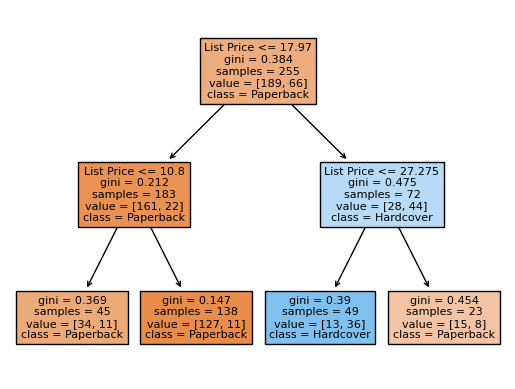

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Define target variable (y) and predictor (X)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]
X = ab_reduced_noNaN_train[["List Price"]]

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
clf.fit(X, y)

# Visualize the decision tree
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)

•	If a book price is less than or equal to 17.97, it is more likely to be “Paperback".
•	If its price is between 17.97 and 27.275, it most likely will be “Hardcover.”
•	For books priced ≤10.8, the model is confident it's a “Paperback.”

ChatGPT Summary:

	•	Visualization: tree.plot_tree(clf) plots the decision tree, showing how List Price is used to predict whether a book is Hardcover or Paperback.
	•	Root Node: The first decision split is based on a List Price threshold (e.g., <= 15.99 for Paperback, > 15.99 for Hardcover).
	•	Internal Nodes: If the tree depth is greater than 1, additional splits refine the classification based on List Price.
	•	Leaf Nodes: Each leaf node gives the final prediction—1 (Hardcover) or 0 (Paperback), based on which List Price range the book falls into.

The decision tree predicts the book’s type (Hardcover/Paperback) based on its price, with a simple rule (e.g., price threshold) determining the classification.

**5.**

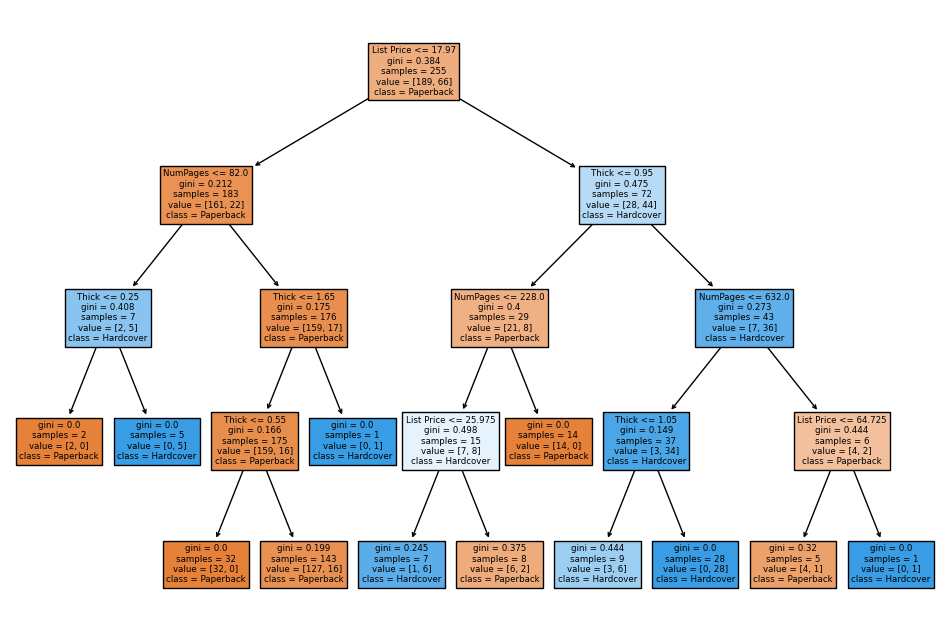

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define target variable (y) and predictor variables (X)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier on the training data
clf2.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12,8))  # Optional: Increase size for better visibility
tree.plot_tree(clf2, feature_names=["NumPages", "Thick", "List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()

In this case, the classification process inclues Number of pages, List prices and Thickness of the books
If the list price is less than equals to 17.97,Numpages greater 82 and thickness is less than or equals to 1.65, its more likely a paperback. 
If List price is greater than 17.97, Thickness is greater than 0.95 ad Numpages is less than or equals to 632, then it's most likely a Hardcover

ChatGPT Summary:
The decision tree clf2 is trained using NumPages, Thick, and List Price to predict whether a book is Hardcover or Paperback, with a max_depth=4. The tree splits based on these features, and at each node, it chooses the best feature to separate the classes. Predictions are made by following the splits until a leaf node is reached, where the majority class (Hardcover or Paperback) is assigned. Visualizing the tree with tree.plot_tree(clf2) shows how these features influence the classification.

**6.**

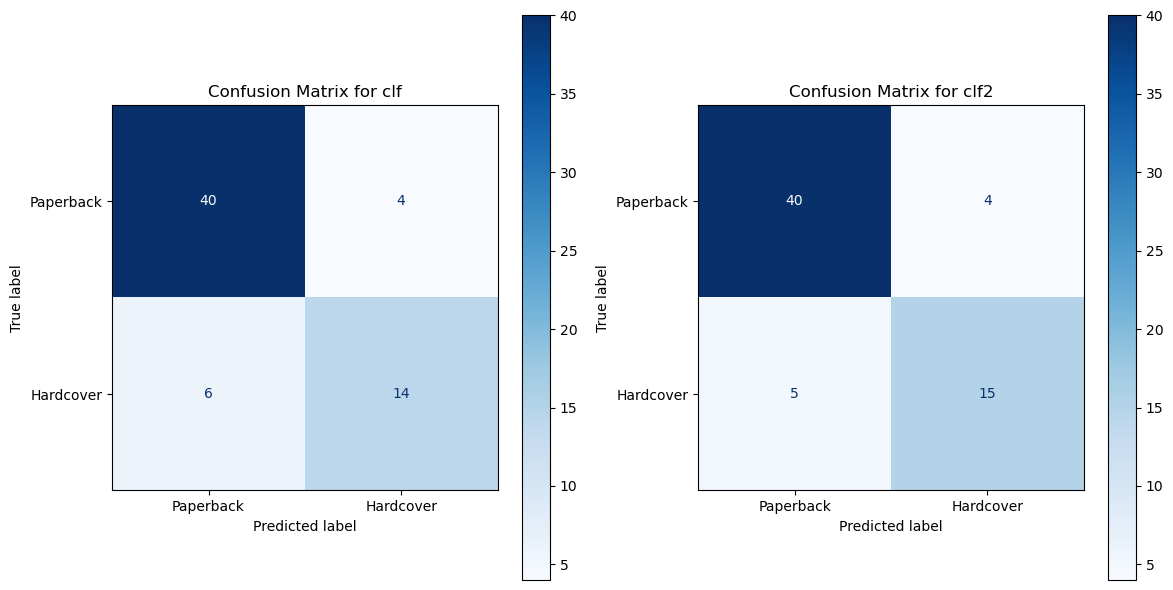

In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the true labels (y_true) and predicted labels (y_pred) for clf
y_true = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])["H"]
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])

# Generate confusion matrix for clf
cm_clf = confusion_matrix(y_true, y_pred_clf)

# Define the true labels (y_true) and predicted labels (y_pred) for clf2
y_pred_clf2 = clf2.predict(ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']])

# Generate confusion matrix for clf2
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

# Create display objects for each confusion matrix
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardcover"])
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardcover"])

# Plot both confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display confusion matrix for clf
disp_clf.plot(cmap='Blues', ax=ax[0])
ax[0].set_title("Confusion Matrix for clf")

# Display confusion matrix for clf2
disp_clf2.plot(cmap='Blues', ax=ax[1])
ax[1].set_title("Confusion Matrix for clf2")

plt.tight_layout()
plt.show()

In [10]:
# Function to calculate metrics: accuracy, sensitivity, specificity
def calculate_metrics(cm):
    # Extract values from confusion matrix
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    # Calculate metrics
    accuracy = (TP + TN) / np.sum(cm)  # (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)  # TP / (TP + FN)
    specificity = TN / (TN + FP)  # TN / (TN + FP)

    # Return metrics rounded to 3 decimal places
    return np.round(accuracy, 3), np.round(sensitivity, 3), np.round(specificity, 3)

# Calculate metrics for clf
accuracy_clf, sensitivity_clf, specificity_clf = calculate_metrics(cm_clf)

# Calculate metrics for clf2
accuracy_clf2, sensitivity_clf2, specificity_clf2 = calculate_metrics(cm_clf2)

# Display results
print(f"clf model metrics:\nAccuracy: {accuracy_clf}\nSensitivity: {sensitivity_clf}\nSpecificity: {specificity_clf}\n")
print(f"clf2 model metrics:\nAccuracy: {accuracy_clf2}\nSensitivity: {sensitivity_clf2}\nSpecificity: {specificity_clf2}")

clf model metrics:
Accuracy: 0.844
Sensitivity: 0.7
Specificity: 0.909

clf2 model metrics:
Accuracy: 0.859
Sensitivity: 0.75
Specificity: 0.909


ChatBot Summary:
The updated code displays the confusion matrices for both clf and clf2 models side by side. Each matrix shows the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) for predicting whether a book is Hardcover or Paperback. The matrices are visualized using a blue color map, making it easy to compare model performance.

**7.**

The first confusion matrix, only List Price is used to make predictions and this might not have captured enough information of the books to make accurate predictions. 
The second matric uses NumPages, Thick and List Prices to make predictions and this most likes results in more accurate predictions

ChatBot Summary:
The differences between the two confusion matrices stem from the features used for training. The first model uses only List Price, while the second model incorporates additional features like NumPages and Thick, which likely improve its predictive accuracy. The confusion matrices for clf and clf2 are better because they use multiple relevant features, leading to more accurate classifications of hardcover vs. paperback books.

**8.**

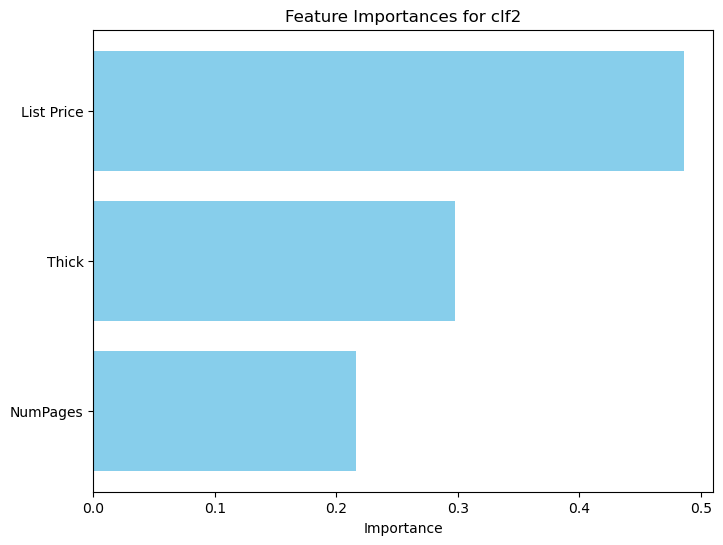

The most important feature for clf2 is: List Price


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances and feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances for clf2')
plt.show()

# Report the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]
print(f"The most important feature for clf2 is: {most_important_feature}")

ChatBot Summary:
To visualize feature importances in clf2, the .feature_importances_ attribute is used, which shows the relative contribution of each feature to the model’s predictions. The code generates a horizontal bar chart to display these importances, and the most important feature is identified by finding the feature with the highest importance value. This helps understand which predictor variable most influences the model’s decision-making process.

**9.**
In linear regression, coeeficent is the average change in the outcome varaible with 1 unit change in predictor variable, assuming other variables are held constant. On the other hand, feature importance in decision trees represnts how valuable each feature is in reducing uncertainty or improving the classification accuracy, without assuming a linear relationship. While coefficents give precise mathematical interpretations, feature importance gives an overall trend and a more holistic view of predictor variance influence

ChatBot Summary:
In linear regression, coefficients show the direct, linear effect of each predictor on the outcome. In decision trees, feature importances indicate how valuable each feature is for improving classification, based on non-linear splits. Linear regression offers clear, linear relationships, while decision trees capture more complex, non-linear feature interactions.

**10.**
Yes